In [88]:
import pandas as pd
import torch
from transformers import AutoImageProcessor, EfficientNetModel, ViTModel, AutoModel, CLIPProcessor, CLIPModel, Blip2Processor, Blip2Model
from torchvision import models, transforms

In [100]:
# load pre-trained image processor for efficientnet-b7 and model weight
processor = Blip2Processor.from_pretrained("Salesforce/blip2-opt-2.7b")
model = Blip2Model.from_pretrained("Salesforce/blip2-opt-2.7b", torch_dtype=torch.float16)


preprocessor_config.json:   0%|          | 0.00/432 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/904 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/798k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.11M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/548 [00:00<?, ?B/s]

/opt/anaconda3/lib/python3.12/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


config.json:   0%|          | 0.00/6.96k [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/127k [00:00<?, ?B/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/10.0G [00:00<?, ?B/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/5.50G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

In [101]:
flags_df = pd.read_csv('national_flags.csv')  # Uncomment if you're loading from a CSV

In [120]:
# Set up logging
import logging

import requests
from PIL import Image
import io

def extract_features(image_url):
    print(image_url)
    headers = {
            'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'
        }
    response = requests.get(image_url, headers=headers)
    response.raise_for_status()  # Raise an error for bad responses
    
    img = Image.open(io.BytesIO(response.content)).convert('RGB')
    # prepare input image
    inputs = processor(images=img, return_tensors='pt', padding=True)
    print('input shape: ', inputs['pixel_values'].shape)
    
    with torch.no_grad():
        outputs = model.get_qformer_features(**inputs)
    embedding = outputs.last_hidden_state
    embedding = embedding[:, 0, :].squeeze(1)
    print('embedding shape: ', embedding.shape)
    #print('embedding shape: ', outputs.shape)
    return embedding.numpy()


In [121]:
np.set_printoptions(threshold=np.inf)
extract_features(flags_df.iloc[1]['Flag Image'])

https://upload.wikimedia.org/wikipedia/commons/thumb/3/36/Flag_of_Albania.svg/220px-Flag_of_Albania.svg.png
input shape:  torch.Size([1, 3, 224, 224])
embedding shape:  torch.Size([1, 768])


array([[-1.8951e-02, -3.7964e-01,  1.6699e+00,  3.9551e-01,  5.4248e-01,
         1.9756e+00, -3.2837e-01,  3.2031e-01, -3.8696e-01,  2.0068e-01,
        -1.0779e-01,  6.8066e-01, -4.3018e-01,  5.9424e-01,  1.1162e+00,
         6.9385e-01, -7.1484e-01,  1.0272e-01,  4.8291e-01, -5.5859e-01,
        -2.3621e-01,  3.7891e-01,  8.7939e-01, -2.1899e-01,  6.2073e-02,
         4.7070e-01,  1.1406e+00, -6.5479e-01, -4.1357e-01, -7.1387e-01,
        -5.9229e-01, -4.6851e-01, -3.9551e-01, -7.5293e-01, -8.3057e-01,
        -9.2969e-01, -2.7180e-03,  2.1765e-01,  3.4399e-01,  5.8008e-01,
         8.6279e-01, -3.4131e-01, -2.1863e-01,  5.0201e-02,  6.7773e-01,
        -5.0977e-01,  6.2012e-01, -5.5664e-01, -9.4287e-01,  1.4368e-01,
         7.6758e-01, -2.5000e-01,  1.8711e+00,  3.9966e-01, -6.2158e-01,
         6.7822e-01, -5.8496e-01, -8.2947e-02, -4.1479e-01, -5.8936e-01,
        -1.9702e-01, -7.5391e-01,  6.6357e-01, -3.7134e-01,  1.6858e-01,
         3.9136e-01,  5.4395e-01,  7.1143e-01,  1.6

In [122]:
# Extract features for all flags
flags_df['features'] = flags_df['Flag Image'].apply(extract_features)

https://upload.wikimedia.org/wikipedia/commons/thumb/c/cd/Flag_of_Afghanistan_%282013%E2%80%932021%29.svg/220px-Flag_of_Afghanistan_%282013%E2%80%932021%29.svg.png
input shape:  torch.Size([1, 3, 224, 224])
embedding shape:  torch.Size([1, 768])
https://upload.wikimedia.org/wikipedia/commons/thumb/3/36/Flag_of_Albania.svg/220px-Flag_of_Albania.svg.png
input shape:  torch.Size([1, 3, 224, 224])
embedding shape:  torch.Size([1, 768])
https://upload.wikimedia.org/wikipedia/commons/thumb/7/77/Flag_of_Algeria.svg/220px-Flag_of_Algeria.svg.png
input shape:  torch.Size([1, 3, 224, 224])
embedding shape:  torch.Size([1, 768])
https://upload.wikimedia.org/wikipedia/commons/thumb/1/19/Flag_of_Andorra.svg/220px-Flag_of_Andorra.svg.png
input shape:  torch.Size([1, 3, 224, 224])
embedding shape:  torch.Size([1, 768])
https://upload.wikimedia.org/wikipedia/commons/thumb/9/9d/Flag_of_Angola.svg/220px-Flag_of_Angola.svg.png
input shape:  torch.Size([1, 3, 224, 224])
embedding shape:  torch.Size([1, 76

/opt/anaconda3/lib/python3.12/site-packages/PIL/Image.py:1000: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


input shape:  torch.Size([1, 3, 224, 224])
embedding shape:  torch.Size([1, 768])
https://upload.wikimedia.org/wikipedia/commons/thumb/1/1a/Flag_of_Argentina.svg/220px-Flag_of_Argentina.svg.png
input shape:  torch.Size([1, 3, 224, 224])
embedding shape:  torch.Size([1, 768])
https://upload.wikimedia.org/wikipedia/commons/thumb/2/2f/Flag_of_Armenia.svg/220px-Flag_of_Armenia.svg.png
input shape:  torch.Size([1, 3, 224, 224])
embedding shape:  torch.Size([1, 768])
https://upload.wikimedia.org/wikipedia/commons/thumb/8/88/Flag_of_Australia_%28converted%29.svg/220px-Flag_of_Australia_%28converted%29.svg.png
input shape:  torch.Size([1, 3, 224, 224])
embedding shape:  torch.Size([1, 768])
https://upload.wikimedia.org/wikipedia/commons/thumb/4/41/Flag_of_Austria.svg/220px-Flag_of_Austria.svg.png
input shape:  torch.Size([1, 3, 224, 224])
embedding shape:  torch.Size([1, 768])
https://upload.wikimedia.org/wikipedia/commons/thumb/d/dd/Flag_of_Azerbaijan.svg/220px-Flag_of_Azerbaijan.svg.png
inpu

In [123]:
flags_df.to_csv('national_flag_embeddings_blip.csv', index=False)

In [74]:
flags_df.iloc[2]['features']

array([[-5.03032565e-01, -5.19494176e-01,  8.67354155e-01,
        -4.26655233e-01,  1.16902031e-02,  2.02877015e-01,
        -6.77348003e-02,  6.18143022e-01, -3.28084230e-01,
         1.28380999e-01,  7.84341469e-02, -5.63418150e-01,
        -3.67220640e-01, -5.54871440e-01, -6.71224743e-02,
         2.70048976e-01, -4.57652628e-01,  3.86088699e-01,
        -3.29874754e-01, -2.60837171e-02,  5.93739986e-01,
        -2.83465892e-01, -2.80567557e-01, -3.10700059e-01,
        -3.94978404e-01,  6.98787332e-01,  3.03306788e-01,
        -3.30806971e-01, -1.66864842e-01, -8.01382542e-01,
        -5.32577217e-01, -5.13863802e-01, -4.71475348e-03,
        -1.10067040e-01, -4.51998740e-01,  1.50890239e-02,
         1.24660745e-01, -6.56477511e-02, -2.14864403e-01,
         4.13834393e-01, -2.64168441e-01,  7.02869415e-01,
         7.70803168e-02, -1.07457161e+00,  4.83268499e-01,
        -7.59079874e-01, -4.98753071e-01, -3.35346818e-01,
        -5.76014400e-01, -1.47769511e-01,  8.53738189e-0

In [26]:
# Filter out countries where feature extraction failed
flags_df = flags_df[flags_df['features'].notnull()]

In [27]:
import pandas as pd
import numpy as np
import re
from sklearn.metrics.pairwise import cosine_similarity
import requests
from io import BytesIO
from PIL import Image
from IPython.display import display

# Function to clean up the feature strings
def clean_feature_string(feature_str):
    # Remove outer square brackets and split by spaces or commas
    cleaned_str = re.sub(r'[\[\]]', '', feature_str)  # Remove brackets
    cleaned_values = np.fromstring(cleaned_str, sep=' ')  # Parse values into numpy array
    return cleaned_values

# Function to get top 5 similar countries
def get_top_5_similar_countries(input_country, csv_file):
    # Read CSV

    # Extract country names
    countries = df['Country'].values
    
    # Clean and convert features into arrays
    features = np.array([clean_feature_string(f) for f in df['features'].values])
    
    # Find the index of the input country
    try:
        input_idx = list(countries).index(input_country)
    except ValueError:
        return f"Country '{input_country}' not found in the dataset."
    
    # Get the embedding of the input country
    input_embedding = features[input_idx].reshape(1, -1)
    
    # Compute cosine similarity
    similarities = cosine_similarity(input_embedding, features)[0]
    
    # Get top 5 similar countries
    top_5_idx = similarities.argsort()[-6:-1][::-1]
    
    # Return top 5 countries with similarity scores
    return [(countries[i], similarities[i]) for i in top_5_idx]




Input Country: India


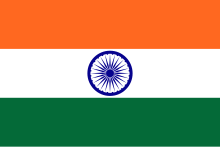

Paraguay: 0.8598572785928591


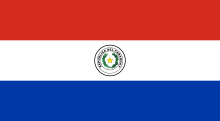

Mauritius: 0.8265701393611716


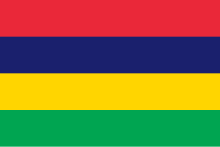

Colombia: 0.823888705662736


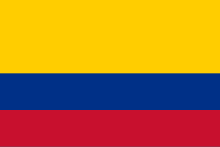

Slovenia: 0.8217777794412915


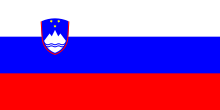

Thailand: 0.8198191881535102


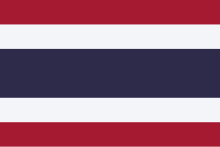

In [31]:
# Example usage
csv_file = 'national_flag_embeddings_efficientnet.csv'
df = pd.read_csv(csv_file)
input_country = 'India'
print(f"Input Country: {input_country}")
input_country_row = df[df['Country'] == input_country].iloc[0]

response = requests.get(input_country_row['Flag Image'])
img = Image.open(BytesIO(response.content))
display(img)

top_5_countries = get_top_5_similar_countries(input_country, csv_file)

for country, score in top_5_countries:
    country_row = df[df['Country'] == country].iloc[0]
    print(f"{country}: {score}")
    response = requests.get(country_row['Flag Image'])
    img = Image.open(BytesIO(response.content))
    display(img)